# Práctica 3

## Ejercicio 1

## Autores : Jorge Martín Pastor y Juan Serrano Vara

## 26 nov 2018

<h1 align = "center" style="background-color:powderblue;"> Importamos las librerias</h1>


In [140]:
% reset
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt 

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


<h1 align = "center" style="background-color:powderblue;"> Importamos los datos</h1>


In [141]:
datos = pd.read_csv('olimpiadas.csv',usecols=("Team","Sex","Age",'Height','Weight','Medal','Sport'))
datos

,Sex,Age,Height,Weight,Team,Sport,Medal
0,M,24.0,180.0,80.0,China,Basketball,NaN
1,M,23.0,170.0,60.0,China,Judo,NaN
2,M,24.0,NaN,NaN,Denmark,Football,NaN
3,M,34.0,NaN,NaN,Denmark/Sweden,Tug-Of-War,Gold
4,F,21.0,185.0,82.0,Netherlands,Speed Skating,NaN
5,F,21.0,185.0,82.0,Netherlands,Speed Skating,NaN
6,F,25.0,185.0,82.0,Netherlands,Speed Skating,NaN
7,F,25.0,185.0,82.0,Netherlands,Speed Skating,NaN
8,F,27.0,185.0,82.0,Netherlands,Speed Skating,NaN
9,F,27.0,185.0,82.0,Netherlands,Speed Skating,NaN


<h1 align = "center" style="background-color:powderblue;"> 1) Preprocesamiento de los datos</h1>


## Categorizamos la columna deporte, sexo y medal

In [142]:
datos['Deporte'] = datos.Sport.astype('category').cat.codes.astype(int)

# Mujer =1 hombre = 0
datos['Sexo'] = datos.Sex.astype('category').cat.codes.astype(int)

# Categorizamos la columna medal
datos['Medalla'] = datos.Medal.astype('category').cat.codes.astype(int)

# Sustituimos el valor -1 por 3, nos parece mejor operar con valores positivos.
mask = datos.Medalla == -1
column_name = 'Medalla'
datos.loc[mask, column_name] = 3
datos

,Sex,Age,Height,Weight,Team,Sport,Medal,Deporte,Sexo,Medalla
0,M,24.0,180.0,80.0,China,Basketball,NaN,8,1,3
1,M,23.0,170.0,60.0,China,Judo,NaN,32,1,3
2,M,24.0,NaN,NaN,Denmark,Football,NaN,24,1,3
3,M,34.0,NaN,NaN,Denmark/Sweden,Tug-Of-War,Gold,61,1,1
4,F,21.0,185.0,82.0,Netherlands,Speed Skating,NaN,53,0,3
5,F,21.0,185.0,82.0,Netherlands,Speed Skating,NaN,53,0,3
6,F,25.0,185.0,82.0,Netherlands,Speed Skating,NaN,53,0,3
7,F,25.0,185.0,82.0,Netherlands,Speed Skating,NaN,53,0,3
8,F,27.0,185.0,82.0,Netherlands,Speed Skating,NaN,53,0,3
9,F,27.0,185.0,82.0,Netherlands,Speed Skating,NaN,53,0,3


##### Guardamos en una variable el numero del deporte que pertenenece a cada variable, esto lo utilizaremos en el último ejercicio

In [143]:
##### Badmintong
variableBadmintong = datos[datos['Sport'].str.contains('Badminton')]
variableBadmintong = variableBadmintong['Deporte'].iloc[0]

##### Basketball
variableBasketball = datos[datos['Sport'].str.contains('Basketball')]
variableBasketball = variableBasketball['Deporte'].iloc[0]

#### Athletics
variableAthletics = datos[datos['Sport'].str.contains('Athletics')]
variableAthletics = variableAthletics['Deporte'].iloc[0]

## Borramos los que no tiene medallas

In [144]:
datosPreprocesados = datos.drop(datos[datos.Medalla == 3].index)

## Borramos todos los datos que no sean de españa

In [145]:
datosPreprocesados = datosPreprocesados[datosPreprocesados['Team'].str.contains('Spain')]

## Replazamos las columnas que han sido categorizadas

In [146]:
datosPreprocesados = datosPreprocesados.drop(['Sex'], axis=1)
datosPreprocesados = datosPreprocesados.drop(['Sport'], axis=1)
datosPreprocesados = datosPreprocesados.drop(['Medal'], axis=1)
datosPreprocesados

,Age,Height,Weight,Team,Deporte,Sexo,Medalla
159,30.0,194.0,87.0,Spain,22,1,0
182,22.0,186.0,83.0,Spain,63,1,1
188,28.0,181.0,82.0,Spain,46,1,1
191,26.0,182.0,67.0,Spain,5,1,0
702,22.0,NaN,NaN,Spain,24,1,1
1029,23.0,198.0,93.0,Spain,8,1,0
1154,21.0,NaN,NaN,Spain,24,1,2
2263,27.0,170.0,67.0,Spain,28,0,0
2280,23.0,167.0,50.0,Spain,41,0,2
3833,26.0,164.0,55.0,Spain,46,0,1


## Eliminamos la columna Team ya que todos son de España

In [147]:
datosPreprocesados = datosPreprocesados.drop(['Team'], axis=1)

## Eliminamos las filas que tengan algun NAN en cualquiera de las columnas

In [148]:
datosPreprocesados = datosPreprocesados.dropna()

## Datos resultantes

In [149]:
datosPreprocesados

,Age,Height,Weight,Deporte,Sexo,Medalla
159,30.0,194.0,87.0,22,1,0
182,22.0,186.0,83.0,63,1,1
188,28.0,181.0,82.0,46,1,1
191,26.0,182.0,67.0,5,1,0
1029,23.0,198.0,93.0,8,1,0
2263,27.0,170.0,67.0,28,0,0
2280,23.0,167.0,50.0,41,0,2
3833,26.0,164.0,55.0,46,0,1
4002,23.0,182.0,75.0,24,1,2
4067,29.0,179.0,90.0,28,0,0


## Datos conjunto de entrenamiento y validación

El 80% de los datos será para el entrenamiento y el 20 % restante para la validación

In [150]:
train, test = train_test_split(datosPreprocesados, test_size=0.2,shuffle=False)

Seleccionamos los datos para el entrenamiento

In [151]:
# Datos para el entrenamiento

train_label = train['Medalla']
train = train.drop(['Medalla'], axis=1)

train = train.values.tolist()
train_label = train_label.values.tolist()

# Datos para la evaluación

validation_label = test['Medalla']
validation = test.drop(['Medalla'], axis=1)


validation = validation.values.tolist()
validation_label = validation_label.values.tolist()

<h1 align = "center" style="background-color:powderblue;">2) Prueba con distintas configuraciones de las dos métricas principales.</h1>

### Entrenamos el modelo

# K Neighbors Classifier

Se han probado distintas condfiguraciones como para el parametro metric:

    -La distancia euclidean.
    
    -La distancia de manhattan.
    
    -La distancia chebyshev.
    
    -La distancia minkowski.

La validación del modelo se podría realizar con score, pero hemos preferido realizarlo nosotros manualmente prediciendo y comparando con el resultado esperado. 

In [152]:
# Creamos el clasificador
classifier = KNeighborsClassifier(metric='minkowski',n_neighbors=3)

# Entrenamos el clasificador
classifier.fit(train, train_label)

# Predecimos para luego calcular el error.
y_pred = classifier.predict(validation) 


## Comparamos lo predecido con lo que deberíamos obtener
print(confusion_matrix(validation_label, y_pred))  
print(classification_report(validation_label, y_pred))


[[13  2 11]
 [ 2  9  4]
 [13  7 26]]
             precision    recall  f1-score   support

          0       0.46      0.50      0.48        26
          1       0.50      0.60      0.55        15
          2       0.63      0.57      0.60        46

avg / total       0.56      0.55      0.55        87



### Explicación de las variables de la tabla mostrada con anterioridad

<img src="explicacion precision.png"/>

### La siguiente gráfica muestra el error mínimo en función de K, nos servirá para elegir cual es el mejor k

Advertencia: El siguiente código ha sido importado de internet, no es original, hemos decidimo ponerlo porque nos ha parecido muy interesante ver la variación del error en función de k

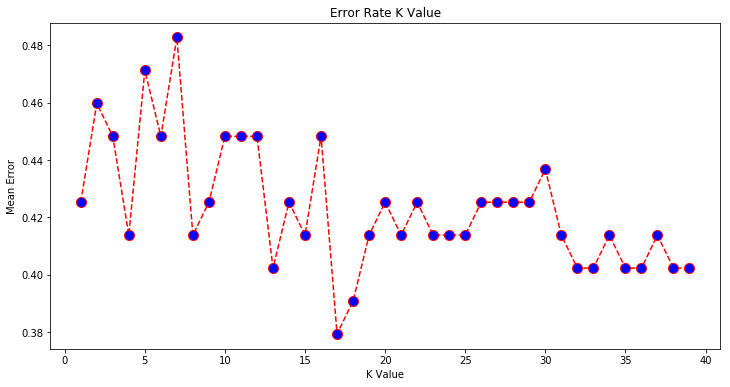

In [153]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train, train_label)
    pred_i = knn.predict(validation)
    error.append(np.mean(pred_i != validation_label))
    
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  
plt.show()

#### Histograma para la selección de la mejor métrica

([<matplotlib.axis.XTick at 0x11442cba8>,
 <a list of 4 Text xticklabel objects>)

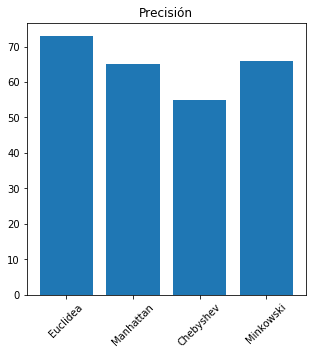

In [159]:
# Precisiones obtenidas con anterioridad
Euclidea = 73
Manhattan = 65
Chebyshev = 55
Minkowski = 66

plt.figure(figsize=(5,5))

objects = ('Euclidea', 'Manhattan', 'Chebyshev','Minkowski')

datos = np.array([Euclidea,Manhattan,Chebyshev,Minkowski])

plt.bar(np.arange(4),datos)  # Dibujamos el gráfico de barras
#plt.ylim(550,650)  # Limitamos los valores del eje y al range definido [450, 550]
plt.title('Precisión')  # Colocamos el título
plt.xticks(np.arange(4),objects,rotation = 45)  # Colocamos las etiquetas del eje x, en este caso, las fechas

<h1 align = "center" style="background-color:powderblue;">3) Elige la mejor configuración entre las anteriores.</h1>

De las métricas indicadas con anteriorioridad la mejor confguración es con un k de 30 y la metrcia de Euclidea

Modelo seleccionado

In [160]:
# Cronstruimos el mejor de los modelos obtenidos
classifier = KNeighborsClassifier(metric='minkowski',n_neighbors=3)

# Entrenamos el mejor de los modelos obtenidos
classifier.fit(train, train_label)  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

<h1 align = "center" style="background-color:powderblue;">4)Utiliza el clasificador para saber que medalla es más probable que ganen los siguientes deportistas</h1>

#### Predicción para Carolina Marín

In [156]:
Carolina_Marin = [25,172,65,variableBadmintong,0]
#clf.predict([Carolina_Marin])
matriz = classifier.predict_proba([Carolina_Marin])

print('\nCarolina Marín')
print('La probabilidad de que gane la medalla de oro es: ',matriz[0][1]*100,'%')
print('La probabilidad de que gane la medalla de plata es: ',matriz[0][2]*100,'%')
print('La probabilidad de que gane la medalla de bronce es: ',matriz[0][0]*100,'%')



Carolina Marín
La probabilidad de que gane la medalla de oro es:  66.66666666666666 %
La probabilidad de que gane la medalla de plata es:  33.33333333333333 %
La probabilidad de que gane la medalla de bronce es:  0.0 %


#### Predicción para Bruno Hortelano

In [174]:
Bruno_Hortelano = [27,181,72,variableAthletics,1]

matriz = classifier.predict_proba([Bruno_Hortelano])

print('\nBruno Hortelano')
print('La probabilidad de que gane la medalla de oro es: ',matriz[0][1]*100,'%')
print('La probabilidad de que gane la medalla de plata es: ',matriz[0][2]*100,'%')
print('La probabilidad de que gane la medalla de bronce es: ',matriz[0][0]*100,'%')



array([0])

#### Predicción para Selección Española de Baloncesto, para ello cojo la altura, edad y peso medio de las jugadoras de la selección

In [179]:
Seleccion_Española = [26,189,80,variableBasketball,1]

matriz = classifier.predict_proba([Seleccion_Española])

print('\nSeleccion Española')
print('La probabilidad de que gane la medalla de oro es: ',matriz[0][1]*100,'%')
print('La probabilidad de que gane la medalla de plata es: ',matriz[0][2]*100,'%')
print('La probabilidad de que gane la medalla de bronce es: ',matriz[0][0]*100,'%')



Seleccion Española
La probabilidad de que gane la medalla de oro es:  0.0 %
La probabilidad de que gane la medalla de plata es:  100.0 %
La probabilidad de que gane la medalla de bronce es:  0.0 %


<h1 align = "center" style="background-color:powderblue;"> 5) Bibliografía</h1>


Carolina Marin: https://es.wikipedia.org/wiki/Carolina_Mar%C3%ADn

Bruno Hortelano: https://es.wikipedia.org/wiki/Bruno_Hortelano

Selección Española: http://www.feb.es/inicio.aspx?tabid=23

K neihbords : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

K neihbords :    https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/